# <b> Indian Loksabha 2009-14 Analysis </b>

This Google Colab notebook provides a comprehensive analysis of the
indian-national-level-election.csv dataset. It is divided into several
sections, each corresponding to a specific analysis task.

### <b>Sections included: </b>
1. Data Cleaning and Preprocessing
2. Descriptive Analysis
3. Comparative Analysis (with notes on data limitations)
4. Candidate-wise Analysis (with notes on data limitations)
5. Visualization Tasks

## <b>Section 0: Setup and Data Loading </b>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = "/content/drive/My Drive/Colab Notebooks/Loksabha_2024.csv"

df = pd.read_csv(file_path)

In [5]:
df.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


In [6]:
print("Dataset Statistical Info")
df.info()

Dataset Statistical Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73081 entries, 0 to 73080
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   st_name     73081 non-null  object
 1   year        73081 non-null  int64 
 2   pc_no       73081 non-null  int64 
 3   pc_name     73081 non-null  object
 4   pc_type     65011 non-null  object
 5   cand_name   73081 non-null  object
 6   cand_sex    72539 non-null  object
 7   partyname   73081 non-null  object
 8   partyabbre  73081 non-null  object
 9   totvotpoll  73081 non-null  int64 
 10  electors    73081 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


## <b> Section 1: Data Cleaning and Preprocessing Tasks

<h4><i> Handling Missing Values



In [12]:
# 1. Handle missing values
print("Missing values before handling:")
print(df.isnull().sum())


Missing values before handling:
st_name       0
year          0
pc_no         0
pc_name       0
pc_type       0
cand_name     0
cand_sex      0
partyname     0
partyabbre    0
totvotpoll    0
electors      0
dtype: int64


In [10]:
# Replace NULL (string) with NaN values
df.replace('NULL', np.nan, inplace=True)

# Fill NaN values with mode
df.fillna(df.mode().iloc[0], inplace=True)

In [11]:
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
st_name       0
year          0
pc_no         0
pc_name       0
pc_type       0
cand_name     0
cand_sex      0
partyname     0
partyabbre    0
totvotpoll    0
electors      0
dtype: int64


<h4><i> Standardize party and candidate names

In [13]:
df['partyname'] = df['partyname'].str.lower().str.strip()
df['partyabbre'] = df['partyabbre'].str.lower().str.strip()
df['cand_name'] = df['cand_name'].str.lower().str.strip()
df['pc_name'] = df['pc_name'].str.lower().str.strip()
df['st_name'] = df['st_name'].str.lower().str.strip()
print("Standardized party names, candidate names, and constituency names.")

Standardized party names, candidate names, and constituency names.


<h4><i> Remove Duplicates

In [14]:
# We'll remove any rows that are exact duplicates.
initial_rows = len(df)
df.drop_duplicates(inplace=True)
print(f"Removed {initial_rows - len(df)} duplicate rows.")

Removed 1 duplicate rows.


<h4><i> Convert Datatypes

In [15]:
# The `coerce` error handler will turn invalid parsing into NaNs.
df['totvotpoll'] = pd.to_numeric(df['totvotpoll'], errors='coerce')
df['electors'] = pd.to_numeric(df['electors'], errors='coerce')

In [16]:
# Now, we'll fill any NaNs created by the conversion with 0 and convert to int.
df['totvotpoll'] = df['totvotpoll'].fillna(0).astype(int)
df['electors'] = df['electors'].fillna(0).astype(int)
print("Converted 'totvotpoll' and 'electors' to integer type.")
print("-" * 50)

Converted 'totvotpoll' and 'electors' to integer type.
--------------------------------------------------


## <b> Section 2: Descriptive Analysis Tasks

In [17]:
# First, determine the winning candidate for each constituency in each year.

idx = df.groupby(['year', 'pc_no'])['totvotpoll'].transform(max) == df['totvotpoll']
winners_df = df[idx].copy()
print("Identified winning candidates for each constituency and year.")

Identified winning candidates for each constituency and year.


/tmp/ipython-input-1250124948.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = df.groupby(['year', 'pc_no'])['totvotpoll'].transform(max) == df['totvotpoll']


In [18]:
# 1. Total seats contested and won by each party
party_seats_won = winners_df.groupby('partyabbre')['pc_no'].count().sort_values(ascending=False)
print("Total seats won by each party (Top 10):")
print(party_seats_won.head(10))

Total seats won by each party (Top 10):
partyabbre
bjp       207
inc       189
cpm        92
bld        65
jd         54
sp         50
inc(i)     39
aitc       27
bsp        24
adk        21
Name: pc_no, dtype: int64


/tmp/ipython-input-448061534.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_seats_won.head(10).index, y=party_seats_won.head(10).values, palette='viridis')


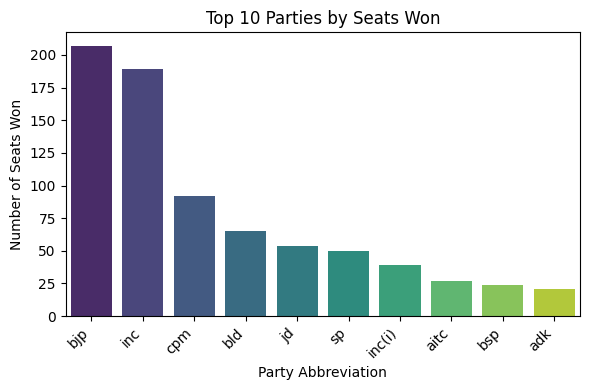

In [21]:
# Visualize the top 10 parties by seats won
plt.figure(figsize=(6,4))
sns.barplot(x=party_seats_won.head(10).index, y=party_seats_won.head(10).values, palette='viridis')
plt.title('Top 10 Parties by Seats Won')
plt.xlabel('Party Abbreviation')
plt.ylabel('Number of Seats Won')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
# 3. State-wise summary of votes, seats, and turnout
state_summary = df.groupby('st_name').agg(
    total_votes=('totvotpoll', 'sum'),
    total_electors=('electors', 'sum')
).reset_index()
state_summary['turnout_percentage'] = (state_summary['total_votes'] / state_summary['total_electors'] * 100)
print("\nState-wise summary (Top 5 by total votes):")
print(state_summary.sort_values(by='total_votes', ascending=False).head())


State-wise summary (Top 5 by total votes):
           st_name  total_votes  total_electors  turnout_percentage
39   uttar pradesh    513370225     17029277259            3.014633
42     west bengal    363231043      3913199857            9.282200
1   andhra pradesh    332391558      6333525177            5.248129
4            bihar    322939729      8314826936            3.883902
23     maharashtra    320909460      7816879554            4.105340


/tmp/ipython-input-1078506082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_summary_sorted['st_name'], y=state_summary_sorted['turnout_percentage'], palette='viridis')


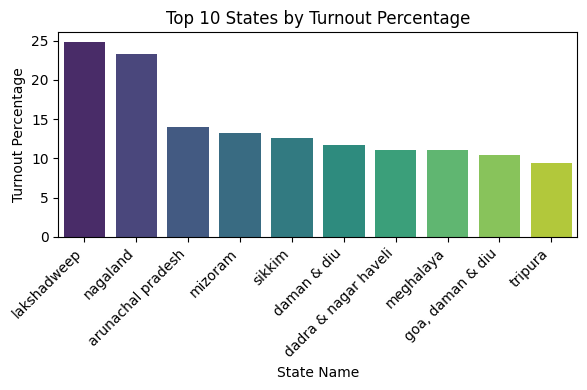

In [26]:
plt.figure(figsize=(6,4))
state_summary_sorted = state_summary.sort_values(by='turnout_percentage', ascending=False).head(10)
sns.barplot(x=state_summary_sorted['st_name'], y=state_summary_sorted['turnout_percentage'], palette='viridis')
plt.title('Top 10 States by Turnout Percentage')
plt.xlabel('State Name')
plt.ylabel('Turnout Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
gender_distribution = df['cand_sex'].value_counts(normalize=True) * 100
print("\nGender distribution of candidates:")
print(gender_distribution)


Gender distribution of candidates:
cand_sex
M    95.00000
F     4.99179
O     0.00821
Name: proportion, dtype: float64


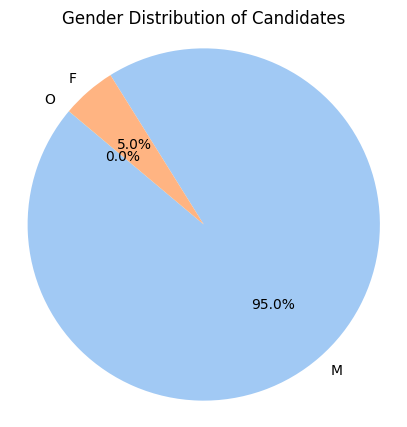

In [28]:
plt.figure(figsize=(5,5))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Gender Distribution of Candidates')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [29]:
# Now pivot to get a side-by-side comparison.
winner_votes = top_two.groupby(['year', 'pc_no']).first().reset_index()
runner_up_votes = top_two.groupby(['year', 'pc_no']).last().reset_index()

NameError: name 'top_two' is not defined

In [30]:
df_sorted = df.sort_values(by='totvotpoll', ascending=False).reset_index(drop=True)
top_two = df_sorted.groupby(['year', 'pc_no']).head(2).reset_index(drop=True)

# Now pivot to get a side-by-side comparison.
winner_votes = top_two.groupby(['year', 'pc_no']).first().reset_index()
runner_up_votes = top_two.groupby(['year', 'pc_no']).last().reset_index()

# Merge them on year and constituency to calculate margin.
margin_df = pd.merge(winner_votes[['year', 'pc_no', 'totvotpoll']],
                     runner_up_votes[['year', 'pc_no', 'totvotpoll']],
                     on=['year', 'pc_no'],
                     suffixes=('_winner', '_runner_up'))

margin_df['winning_margin'] = margin_df['totvotpoll_winner'] - margin_df['totvotpoll_runner_up']
margin_df['winning_margin_percentage'] = (margin_df['winning_margin'] / margin_df['totvotpoll_winner']) * 100
print("\nWinning margin distribution summary:")
print(margin_df[['winning_margin', 'winning_margin_percentage']].describe())
print("-" * 50)


Winning margin distribution summary:
       winning_margin  winning_margin_percentage
count      919.000000                 919.000000
mean     66073.595212                  19.908036
std      62708.966700                  17.488852
min         86.000000                   0.011971
25%      20731.500000                   6.411772
50%      45724.000000                  14.497837
75%      92886.500000                  28.478426
max     397117.000000                  77.938613
--------------------------------------------------


## <b> Section 3: Comparative Analysis Tasks

<h5>  <i> Filter Data for 2019 and 2014

In [31]:
# Filter data for 2014 and 2009
df_2014 = df[df['year'] == 2014]
df_2009 = df[df['year'] == 2009]

<h4> <i> Seat change for each party (2014 vs 2009)

In [32]:
winners_2014 = df_2014.loc[df_2014.groupby('pc_no')['totvotpoll'].idxmax()]
winners_2009 = df_2009.loc[df_2009.groupby('pc_no')['totvotpoll'].idxmax()]

seats_2014 = winners_2014['partyabbre'].value_counts()
seats_2009 = winners_2009['partyabbre'].value_counts()

seat_change = (seats_2014 - seats_2009).fillna(0).sort_values(ascending=False)
print("\nSeat change (2014 vs 2009) - Top 10 positive change:")
print(seat_change.head(10))


Seat change (2014 vs 2009) - Top 10 positive change:
partyabbre
bjp      58.0
shs       1.0
ad        0.0
audf      0.0
ysrcp     0.0
bjd       0.0
bsp       0.0
bopf      0.0
cpm       0.0
inc       0.0
Name: count, dtype: float64


<h4> <i> Constituency Wise Change for Winning Party

In [33]:
# 3. Constituency-wise changes in winning party (2014 vs 2009)
winner_parties_2014 = winners_2014.set_index('pc_no')['partyabbre']
winner_parties_2009 = winners_2009.set_index('pc_no')['partyabbre']
merged_winners = pd.DataFrame({
    'winner_2009': winner_parties_2009,
    'winner_2014': winner_parties_2014
}).dropna()
changed_constituencies = merged_winners[merged_winners['winner_2009'] != merged_winners['winner_2014']]
print(f"\nNumber of constituencies where the winning party changed: {len(changed_constituencies)}")
print("Example of a few constituencies with changed winning parties:")
print(changed_constituencies.head())


Number of constituencies where the winning party changed: 71
Example of a few constituencies with changed winning parties:
      winner_2009 winner_2014
pc_no                        
2             cpm         bjp
3             inc         bjp
4            audf         bjp
5            bopf         ind
6             inc         bjp


<h4> <i> Incumbency Calculation

In [35]:
incumbents_2009 = winners_2009[['pc_no', 'cand_name']].set_index('pc_no')
incumbents_2014 = winners_2014[['pc_no', 'cand_name']].set_index('pc_no')

re_elected_incumbents = 0
for pc in incumbents_2014.index:
    if pc in incumbents_2009.index:
        if incumbents_2014.loc[pc, 'cand_name'] == incumbents_2009.loc[pc, 'cand_name']:
            re_elected_incumbents += 1

print(f"\nNumber of incumbents re-elected from 2009 to 2014: {re_elected_incumbents}")
print("-" * 50)


Number of incumbents re-elected from 2009 to 2014: 5
--------------------------------------------------


## <b> Candidate Wise Analysis

In [36]:
# We'll reuse the 'margin_df' created earlier.
top_10_margins = margin_df.sort_values(by='winning_margin', ascending=False).head(10)
# To get the candidate name, we need to merge this back with the main dataframe.
top_10_candidates = pd.merge(top_10_margins, winners_df, on=['year', 'pc_no'])
print("\nTop 10 candidates with the highest winning margins:")
print(top_10_candidates[['year', 'st_name', 'pc_name', 'cand_name', 'partyabbre', 'winning_margin']].reset_index(drop=True))



Top 10 candidates with the highest winning margins:
   year        st_name    pc_name                      cand_name partyabbre  \
0  2004    maharashtra   baramati  pawar sharadchandra govindrao        ncp   
1  2014  uttar pradesh   varanasi                  narendra modi        bjp   
2  2004  uttar pradesh    kairana             anuradha choudhary        rld   
3  2004    west bengal   arambagh                      anil basu        cpm   
4  2004  uttar pradesh   mainpuri            mulayam singh yadav         sp   
5  2009    maharashtra      madha  pawar sharadchandra govindrao        ncp   
6  2014  uttar pradesh  gorakhpur                     adityanath        bjp   
7  2014  uttar pradesh    phulpur           keshav prasad maurya        bjp   
8  2004  uttar pradesh    kannauj                 akhilesh yadav         sp   
9  2014  uttar pradesh   faizabad                    lallu singh        bjp   

   winning_margin  
0          397117  
1          371784  
2          342414

In [38]:
# These are the contests with the lowest winning margin.
top_10_closest = margin_df.sort_values(by='winning_margin', ascending=True).head(10)
closest_contests_df = pd.merge(top_10_closest, winners_df, on=['year', 'pc_no'])
print("\nTop 10 closest contests (lowest winning margin):")
print(closest_contests_df[['year', 'st_name', 'pc_name', 'cand_name', 'partyabbre', 'winning_margin']].reset_index(drop=True))



Top 10 closest contests (lowest winning margin):
   year        st_name        pc_name  \
0  2014        gujarat          surat   
1  1980     tamil nadu  mayiladuturai   
2  1999  uttar pradesh      ghatampur   
3  1977    maharashtra   ichalkaranji   
4  2009  uttar pradesh      chandauli   
5  1996          bihar     hazaribagh   
6  2004  uttar pradesh          chail   
7  1991        tripura   tripura east   
8  2004    west bengal        barasat   
9  2014    maharashtra     ahmadnagar   

                                 cand_name partyabbre  winning_margin  
0                  darshana vikram jardosh        bjp              86  
1                  kudanthai ramalingam n.     inc(i)              97  
2                       pyare lal sankhwar        bsp             105  
3  mane rajaram alias balasaheb shankarrao        inc             116  
4                                ramkishun         sp             459  
5                   mahabir lal viswakarma        bjp             

## <b> Visualization of Indian Election Dataset

<h4> <i> Party Wise Winning

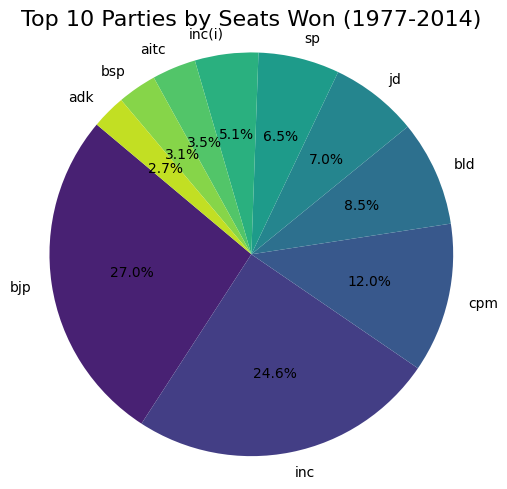

In [42]:
# Plot top 10 parties by seats won as a pie chart
plt.figure(figsize=(5,5))
plt.pie(party_seats_won.head(10), labels=party_seats_won.head(10).index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 10))
plt.title('Top 10 Parties by Seats Won (1977-2014)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

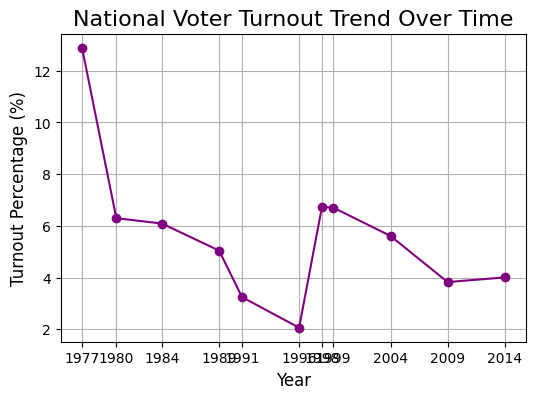

In [45]:
# We need to get total votes and total electors per year to calculate turnout.
yearly_turnout = df.groupby('year').agg(
    total_votes=('totvotpoll', 'sum'),
    total_electors=('electors', 'sum')
).reset_index()

# Drop rows where total_electors is 0 to avoid division by zero
yearly_turnout = yearly_turnout[yearly_turnout['total_electors'] > 0]
yearly_turnout['turnout_percentage'] = (yearly_turnout['total_votes'] / yearly_turnout['total_electors']) * 100

plt.figure(figsize=(6,4))
plt.plot(yearly_turnout['year'], yearly_turnout['turnout_percentage'], marker='o', linestyle='-', color='purple')
plt.title('National Voter Turnout Trend Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Turnout Percentage (%)', fontsize=12)
plt.xticks(yearly_turnout['year'].unique())
plt.grid(True)
plt.show()



NOTE: Maps cannot be generated with the current dataset as it lacks geographic coordinates or shapefile data.
This would require merging with an external geospatial dataset.


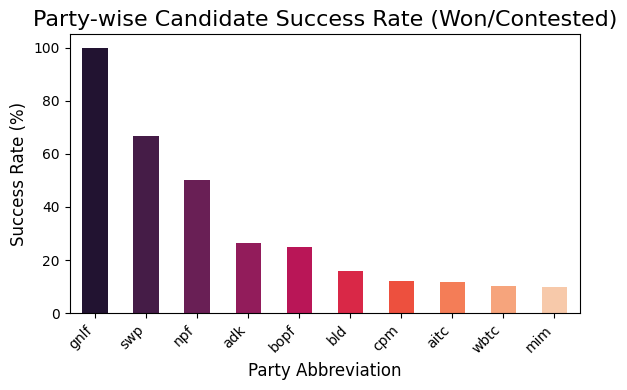

In [47]:
# that is not present in this dataset. We cannot plot a map with this data alone.
print("\nNOTE: Maps cannot be generated with the current dataset as it lacks geographic coordinates or shapefile data.")
print("This would require merging with an external geospatial dataset.")

# 5. Party-wise success rate of candidates (won/contested ratio)
# Count candidates contested per party
candidates_contested = df.groupby('partyabbre')['cand_name'].count()
# Count seats won per party (reusing `party_seats_won` from earlier)
candidates_won = party_seats_won
# Calculate success rate
success_rate = (candidates_won / candidates_contested * 100).sort_values(ascending=False).fillna(0)
# Plot top 10 parties by success rate
plt.figure(figsize=(6,4))
success_rate.head(10).plot(kind='bar', color=sns.color_palette("rocket", 10))
plt.title('Party-wise Candidate Success Rate (Won/Contested)', fontsize=16)
plt.xlabel('Party Abbreviation', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
